In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Pre-processing
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import string
import warnings
warnings.filterwarnings('ignore')
import re

#for execution time
import time

- Load data from JSON
- Group by data by categories and select first 1000 observations from each category 
- Filter dataframe based on 6 categories
- Create the summary feature and subset the dataframe to contain only the summary and the category (target)

In [2]:
df = pd.read_json('C://Users//benja//Downloads//News_Category_Dataset_v2.json', lines=True)

<AxesSubplot:>

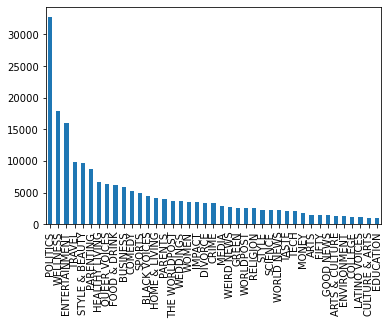

In [3]:
df['category'].value_counts().plot.bar()

In [4]:
df = df.groupby(by='category').head(1000)
category_list = ['POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'BUSINESS', 'SPORTS', 'RELIGION']
df = df[df['category'].isin(category_list)]
df['summary'] = df['headline'] + '. ' +  df['short_description']
df = df[['summary','category']]

<AxesSubplot:>

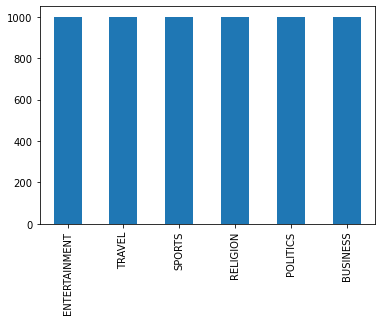

In [5]:
df['category'].value_counts().plot.bar()

**Preprocess summaries**

In [4]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_summary(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['summary'] = df['summary'].apply(clean_summary)

**Extract all_data and all_labels**

In [5]:
all_data = df['summary']
all_labels = df['category']

In [6]:
X_train, X_test, y_train, y_test = (train_test_split(all_data, all_labels, train_size=.8, random_state=1))

In [7]:
def sklearn_models(model,X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    labels = model.predict(X_test)
    mat = confusion_matrix(y_test, labels)


    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

    plt.xlabel('true label')
    plt.ylabel('predicted label')    
    plt.show()
    
    print('Accuracy score:', accuracy_score(y_test, labels))
    print("Execution time: %s seconds " % (time.time() - start_time))

# Model 1: Multinomial Naive Bayes

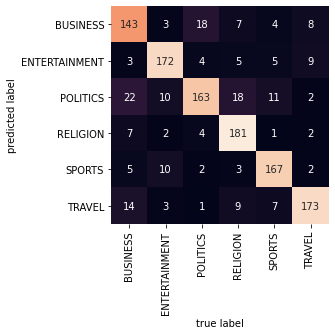

Accuracy score: 0.8325
Execution time: 0.414013147354126 seconds 


In [8]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
sklearn_models(model1, X_train, X_test, y_train, y_test)

# Model 2: Multi-Layer Perceptron Network with tf-idf scores

Iteration 1, loss = 1.76977726
Iteration 2, loss = 1.60351343
Iteration 3, loss = 1.32187125
Iteration 4, loss = 0.98323294
Iteration 5, loss = 0.67417659
Iteration 6, loss = 0.44809947
Iteration 7, loss = 0.30276585
Iteration 8, loss = 0.21223820
Iteration 9, loss = 0.15487304
Iteration 10, loss = 0.11679292
Iteration 11, loss = 0.09091951
Iteration 12, loss = 0.07258157
Iteration 13, loss = 0.05919687
Iteration 14, loss = 0.04929657
Iteration 15, loss = 0.04166734
Iteration 16, loss = 0.03576658
Iteration 17, loss = 0.03108129
Iteration 18, loss = 0.02730546
Iteration 19, loss = 0.02423475
Iteration 20, loss = 0.02168057
Iteration 21, loss = 0.01953934
Iteration 22, loss = 0.01773663
Iteration 23, loss = 0.01618349
Iteration 24, loss = 0.01486461
Iteration 25, loss = 0.01371404
Iteration 26, loss = 0.01271070
Iteration 27, loss = 0.01182896
Iteration 28, loss = 0.01105583
Iteration 29, loss = 0.01036368
Iteration 30, loss = 0.00975139
Iteration 31, loss = 0.00919852
Iteration 32, los

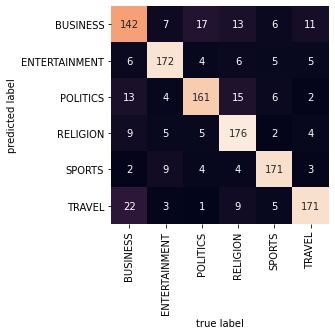

Accuracy score: 0.8275
Execution time: 86.26317501068115 seconds 


In [9]:
model2a = make_pipeline(TfidfVectorizer(), MLPClassifier(verbose=True))
sklearn_models(model2a, X_train, X_test, y_train, y_test)

Let's try two hidden layers instead of 1

Iteration 1, loss = 1.77537816
Iteration 2, loss = 1.57639129
Iteration 3, loss = 1.08018774
Iteration 4, loss = 0.48341031
Iteration 5, loss = 0.16718022
Iteration 6, loss = 0.06804888
Iteration 7, loss = 0.03479866
Iteration 8, loss = 0.02154663
Iteration 9, loss = 0.01488533
Iteration 10, loss = 0.01103601
Iteration 11, loss = 0.00862479
Iteration 12, loss = 0.00697047
Iteration 13, loss = 0.00580081
Iteration 14, loss = 0.00491772
Iteration 15, loss = 0.00425651
Iteration 16, loss = 0.00373338
Iteration 17, loss = 0.00331535
Iteration 18, loss = 0.00297532
Iteration 19, loss = 0.00268720
Iteration 20, loss = 0.00240738
Iteration 21, loss = 0.00214661
Iteration 22, loss = 0.00192149
Iteration 23, loss = 0.00173101
Iteration 24, loss = 0.00158048
Iteration 25, loss = 0.00145643
Iteration 26, loss = 0.00135479
Iteration 27, loss = 0.00127188
Iteration 28, loss = 0.00120231
Iteration 29, loss = 0.00114323
Iteration 30, loss = 0.00109281
Iteration 31, loss = 0.00104952
Iteration 32, los

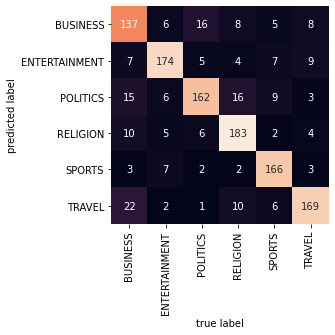

Accuracy score: 0.8258333333333333
Execution time: 59.586411237716675 seconds 


In [10]:
model2b = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100),verbose=True))
sklearn_models(model2b, X_train, X_test, y_train, y_test)

Now three hidden layers

Iteration 1, loss = 1.77903899
Iteration 2, loss = 1.55929379
Iteration 3, loss = 0.81384134
Iteration 4, loss = 0.16188681
Iteration 5, loss = 0.02808344
Iteration 6, loss = 0.01000505
Iteration 7, loss = 0.00545006
Iteration 8, loss = 0.00378390
Iteration 9, loss = 0.00282849
Iteration 10, loss = 0.00221533
Iteration 11, loss = 0.00180854
Iteration 12, loss = 0.00151147
Iteration 13, loss = 0.00129486
Iteration 14, loss = 0.00113064
Iteration 15, loss = 0.00100470
Iteration 16, loss = 0.00090403
Iteration 17, loss = 0.00082378
Iteration 18, loss = 0.00075857
Iteration 19, loss = 0.00070533
Iteration 20, loss = 0.00066025
Iteration 21, loss = 0.00062275
Iteration 22, loss = 0.00059066
Iteration 23, loss = 0.00056319
Iteration 24, loss = 0.00053956
Iteration 25, loss = 0.00051914
Iteration 26, loss = 0.00050104
Iteration 27, loss = 0.00048513
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


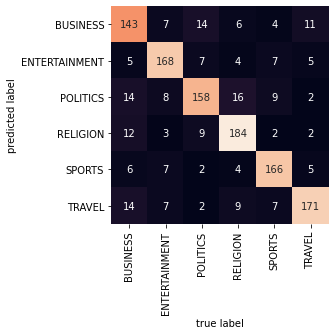

Accuracy score: 0.825
Execution time: 47.63859963417053 seconds 


In [11]:
model2c = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100,100),verbose=True))
sklearn_models(model2c, X_train, X_test, y_train, y_test)